<a href="https://colab.research.google.com/github/jidnyasa257/jidnyasa/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jidnyasa Ajit Uparate**

**May-P2 Batch OIB-SIP.**

**Task no- 3**

**Car Price prediction using machine learning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
df =pd.read_csv('/content/CarPrice.xls')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df['carheight'] = df['carheight'].astype(int)

In [ ]:
df['carwidth'] = df['carwidth'].astype(int)

In [ ]:
df['carlength'] = df['carlength'].astype(int)

In [ ]:
df['wheelbase'] = df['wheelbase'].astype(int)

In [ ]:
df['boreratio'] = df['boreratio'].astype(int)

In [ ]:
df['stroke']= df['stroke'].astype(int)

In [ ]:
df['compressionratio']= df['compressionratio'].astype(int)

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.297561,173.556098,65.414634,53.258537,2555.565854,126.907317,2.887805,2.892683,9.848780,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.066158,12.256372,2.162238,2.472692,520.680204,41.642693,0.316379,0.340408,3.991604,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.000000,141.000000,60.000000,47.000000,1488.000000,61.000000,2.000000,2.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.000000,166.000000,64.000000,52.000000,2145.000000,97.000000,3.000000,3.000000,8.000000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.000000,65.000000,54.000000,2414.000000,120.000000,3.000000,3.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.000000,183.000000,66.000000,55.000000,2935.000000,141.000000,3.000000,3.000000,9.000000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.000000,208.000000,72.000000,59.000000,4066.000000,326.000000,3.000000,4.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<ipython-input-15-38db39b7ad39>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


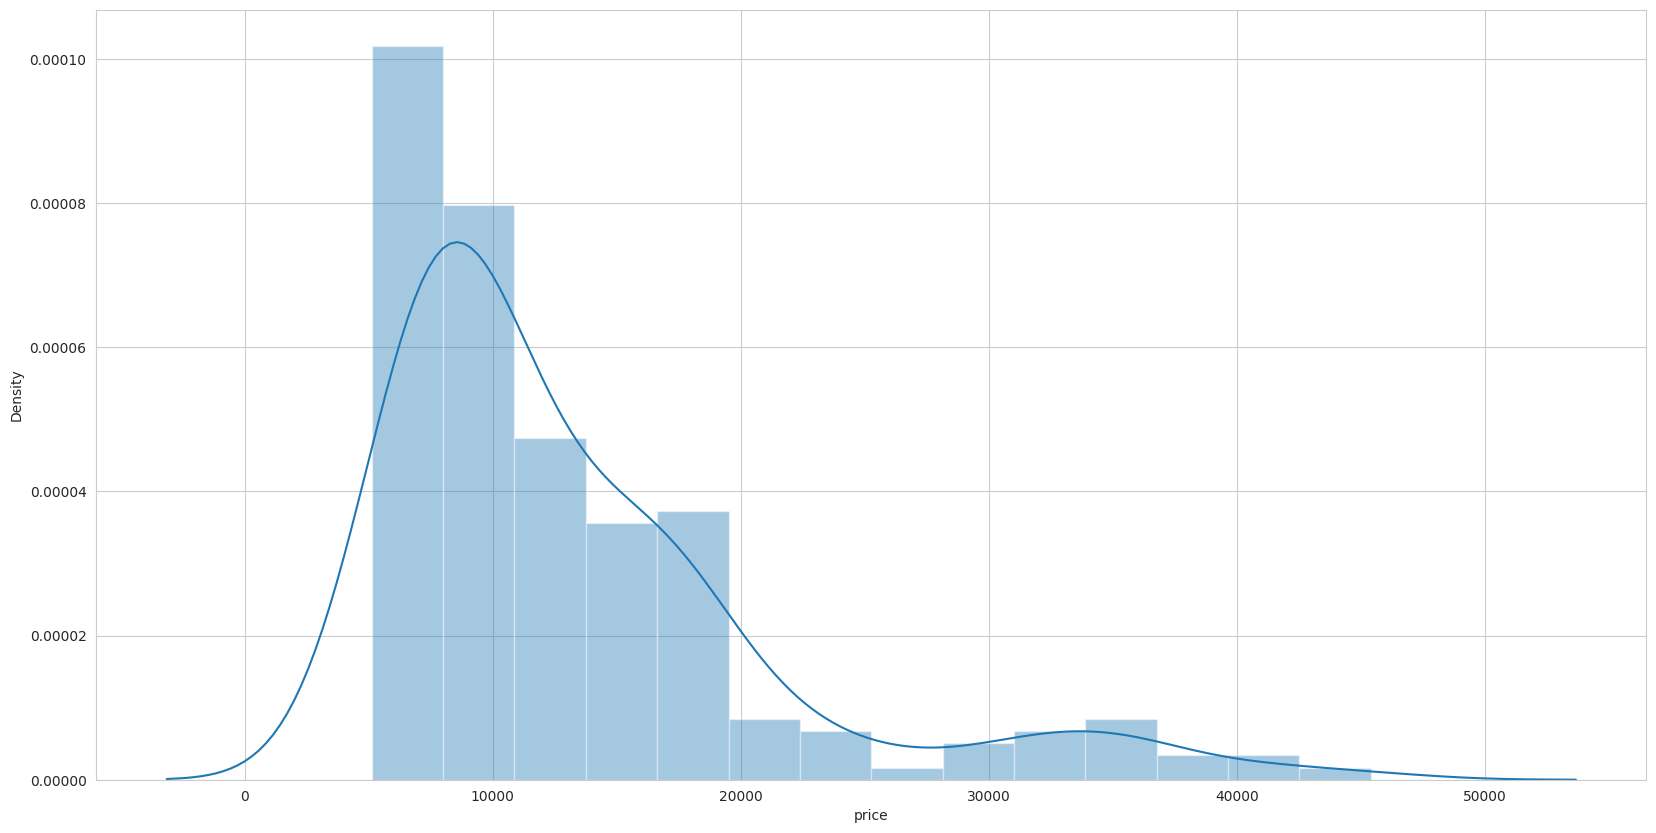

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.distplot(df.price)
plt.show()

In [ ]:
print(df.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.135537   0.167545  0.056063   
symboling        -0.151621   1.000000  -0.533322  -0.355241 -0.225564   
wheelbase         0.135537  -0.533322   1.000000   0.878545  0.781724   
carlength         0.167545  -0.355241   0.878545   1.000000  0.834356   
carwidth          0.056063  -0.225564   0.781724   0.834356  1.000000   
carheight         0.260159  -0.528854   0.577863   0.485652  0.265908   
curbweight        0.071962  -0.227691   0.777860   0.877387  0.861552   
enginesize       -0.033930  -0.105790   0.570816   0.684115  0.729941   
boreratio         0.271890  -0.122112   0.323980   0.463680  0.333467   
stroke           -0.095884  -0.076884   0.148477   0.062546  0.080731   
compressionratio  0.147478  -0.171731   0.249054   0.161443  0.183368   
horsepower       -0.015006   0.070873   0.358038   0.553246  0.642331   
peakrpm          -0.203789   0.273606  -0.356588  -

<ipython-input-16-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<ipython-input-17-e53b6172dfdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


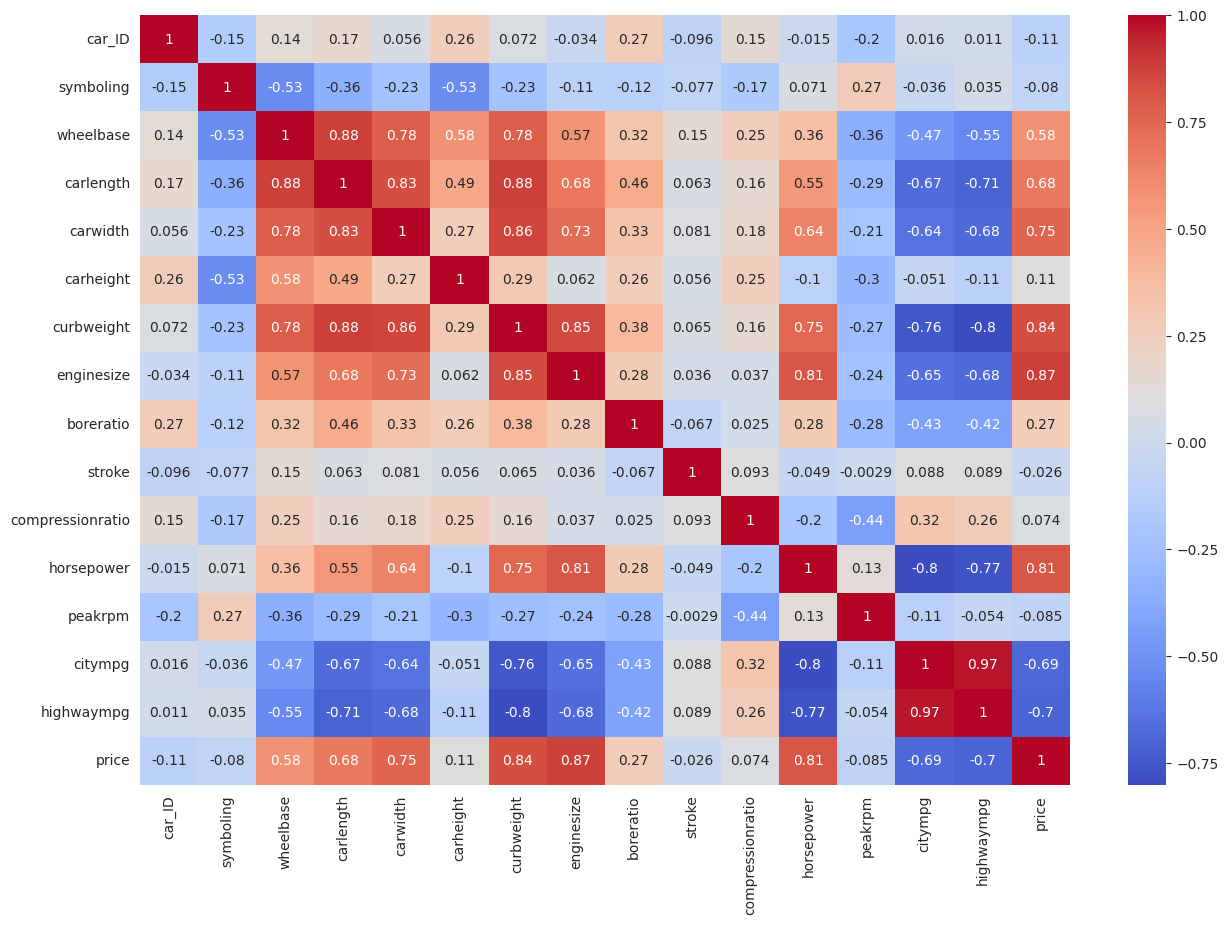

In [ ]:
plt.figure(figsize=(15,10))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
predict = "price"
df = df[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]


In [ ]:
x = np.array(df.drop([predict], 1))
y = np.array(df[predict])


<ipython-input-19-ec99edb02a54>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop([predict], 1))


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)


In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(164, 14)
(41, 14)
(164,)
(41,)


In [ ]:
train_accuracy=model.score(xtrain,ytrain)*100
print("The training accuracy is", train_accuracy)

The training accuracy is 99.87618629787652


In [ ]:
test_accuracy= model.score(xtest,ytest)*100
print("The testing accuracy is", test_accuracy)

The testing accuracy is 91.1337470110371
